In [1]:
# Importing everything we will need down the line here

%matplotlib notebook
import os, glob, re
from functools import reduce
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools as itt

In [2]:
# Defining a function that reads gdat files that BNG/RB generates
def read_gdat(file):
    """Read tabular data from BNG gdat or cdat or similar file. Data needs to be 
       whitespace delimited and first line of file contains whitespace delimited
       column names.
    Args:
        file: Text file containing the data.
    Raises:
    Returns:
        gdat: DataFrame containing the data from the file with column names matching 
        the columns of the input file.
    """
    f =open(file)
    # Get column names from first line of file
    line =f.readline()
    names =re.split('\s+',(re.sub('#','',line)).strip())
    gdat = pd.read_table(f,sep='\s+',header=None,names=names)
    gdat = gdat.set_index("time")
    f.close
    return(gdat)

In [3]:
# Enter the folder where the gdat file/files are in
rb_folder = '/home/cellmod/Workshop_2019/bionetgen/BNG_output_data/'
# Let's switch to that folder so we don't have to feed in absolute paths all the time
os.chdir(rb_folder)
# Get the list of gdat files in each folder
glob_str = '**/*.gdat'
files_to_load = [fname for fname in glob.iglob(glob_str, recursive=True)]
files_to_load = sorted(files_to_load)
# Load in each file using the function defined above
loaded_gdats = list(map(read_gdat, files_to_load))
# Check if we have more than 1 file, if so merge the pandas data frames together
# Note: This seems to change the column names, please print the data frame and check the names
all_df = pd.concat(loaded_gdats, axis=1)

# Some magic to get much nicer indexing for datasets
# e.g. all_df[0] will get you 0th sim data etc.
# First get all column names
col_list = list(all_df.columns)
# Get _unique_ column names
col_set = set(col_list)
# How many times are we repeating them? This is assumed to be = to simulation count
cnt = col_list.count(col_list[0])
# Make a set of tuples where you have (sim_no, species_id)
new_cols = itt.product(range(cnt), sorted(col_set))
# Use it to make MultiIndex for the pandas dataframe
all_df.columns = pd.MultiIndex.from_tuples(list(new_cols))

/home0/shared/cellmod/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: FutureWarning: read_table is deprecated, use read_csv instead.


In [4]:
# We can take a look at the column names
all_df.head()

0                         1                         2          \
              A       B    C    D       A       B    C    D       A       B   
time                                                                          
0.00000  1200.0  1000.0  0.0  0.0  1200.0  1000.0  0.0  0.0  1200.0  1000.0   
0.00001  1196.0  1000.0  0.0  0.0  1200.0  1000.0  0.0  0.0  1197.0  1000.0   
0.00002  1196.0   999.0  1.0  0.0  1197.0  1000.0  0.0  0.0  1196.0  1000.0   
0.00003  1194.0   998.0  1.0  0.0  1194.0   999.0  1.0  0.0  1194.0   999.0   
0.00004  1194.0   996.0  3.0  0.0  1197.0   999.0  1.0  0.0  1194.0   998.0   

                   
           C    D  
time               
0.00000  0.0  0.0  
0.00001  0.0  0.0  
0.00002  0.0  0.0  
0.00003  1.0  0.0  
0.00004  2.0  0.0

<IPython.core.display.Javascript object>


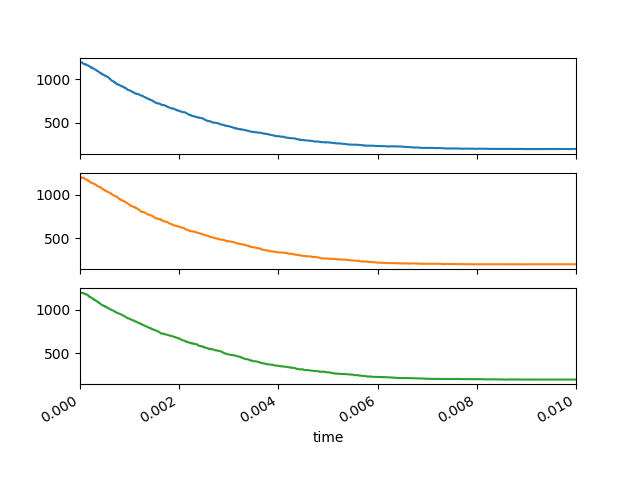

In [5]:
# This will plot each time series in separate plots, this might get 
# unreadble if you have too many time series
axs = all_df.filter(like="A").plot.line(subplots=True, legend=False)

# Note, please press the stop interactivity button once you run this 
# if you want to plot anything after

<IPython.core.display.Javascript object>


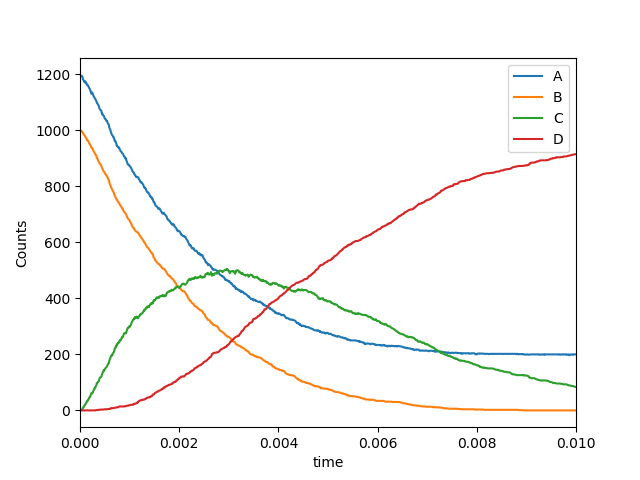

In [6]:
# And filter out certain data and plot all of them in a single plot
ax = all_df[0][["A","B","C","D"]].plot(legend=True)
ax.set_xlabel("time")
_ = ax.set_ylabel("Counts")

<IPython.core.display.Javascript object>


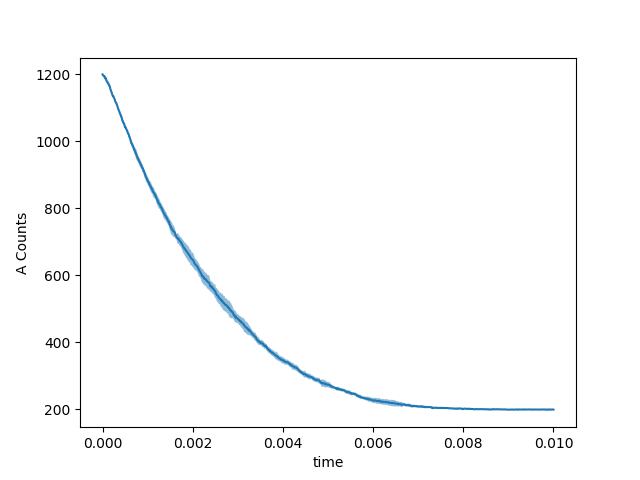

In [7]:
# We can also use matplotlib on it's own to get more specific plots
# here we are plotting the mean of a subset of our data and then 
# shading the +- standard deviation region

# First calculate these values and put them into arrays
a_mean = all_df.filter(like="A").mean(axis=1)
a_std = all_df.filter(like="A").std(axis=1)
# Now we use matplotlib on its own
plt.plot(all_df.index, a_mean)
plt.fill_between(all_df.index, a_mean+a_std, a_mean-a_std, alpha=0.5)
plt.xlabel("time")
_ = plt.ylabel("A Counts")

<IPython.core.display.Javascript object>


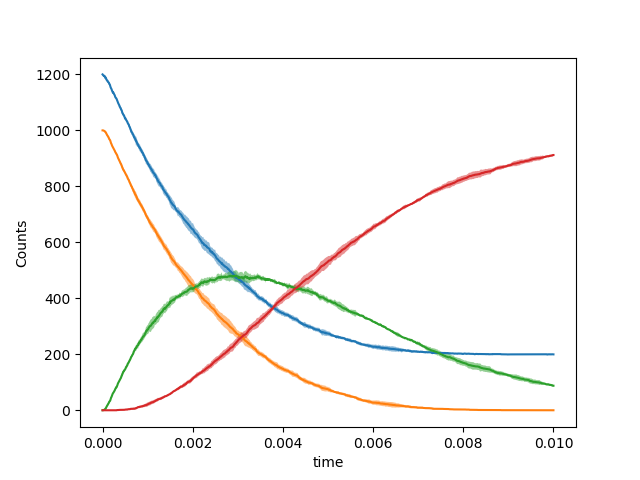

In [8]:
# Let's repeat for all series

# First calculate these values and put them into arrays
b_mean = all_df.filter(like="B").mean(axis=1)
b_std = all_df.filter(like="B").std(axis=1)
c_mean = all_df.filter(like="C").mean(axis=1)
c_std = all_df.filter(like="C").std(axis=1)
d_mean = all_df.filter(like="D").mean(axis=1)
d_std = all_df.filter(like="D").std(axis=1)

# Now we use matplotlib on its own
plt.plot(all_df.index, a_mean)
plt.fill_between(all_df.index, a_mean+a_std, a_mean-a_std, alpha=0.5)
plt.plot(all_df.index, b_mean)
plt.fill_between(all_df.index, b_mean+b_std, b_mean-b_std, alpha=0.5)
plt.plot(all_df.index, c_mean)
plt.fill_between(all_df.index, c_mean+c_std, c_mean-c_std, alpha=0.5)
plt.plot(all_df.index, d_mean)
plt.fill_between(all_df.index, d_mean+d_std, d_mean-d_std, alpha=0.5)
plt.xlabel("time")
_ = plt.ylabel("Counts")

<IPython.core.display.Javascript object>


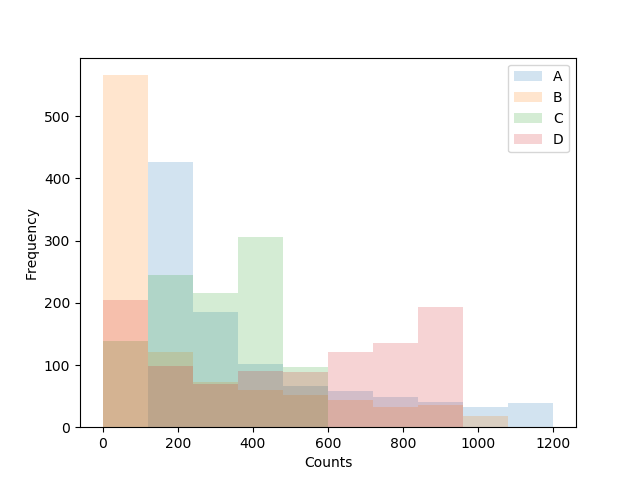

In [9]:
# Pandas still contain many interesting ways to visualize the data
ax = all_df[0].plot.hist(alpha=0.2)
ax.set_xlabel("Counts")
_ = ax.set_ylabel("Frequency")

In [10]:
# Now work with MCell data, taken mostly from here: 
# https://github.com/mcellteam/Workshop_2018/blob/master/plotting/MCell_Organelle_MultiIndex.ipynb
mcell_data_path = "/home/cellmod/Workshop_2019/bionetgen/mcell_output_data/"
os.chdir(mcell_data_path)

mcell_fnames = list(glob.iglob("*/*/*.*.dat"))
mcell_fnames.sort()

df_list = []
for fname in mcell_fnames:
    seed = int(fname.split('/')[-2][5:])
    basename = os.path.basename(fname)
    spec_loc_name, _ = os.path.splitext(basename)
    spec_loc_name = spec_loc_name.replace('.','_')
    df = pd.read_csv(fname, names=['time', "{}".format(spec_loc_name)], delim_whitespace=True)
    df = df.set_index('time')
    df_list.append(df)

# Turn all the dataframes into a single dataframe
mcell_df = pd.concat(df_list, axis=1)


# Some magic to get much nicer indexing for datasets
# e.g. all_df[0] will get you 0th sim data etc.
# First get all column names
col_list = list(mcell_df.columns)
# Get _unique_ column names
col_set = set(col_list)
# How many times are we repeating them? This is assumed to be = to simulation count
cnt = col_list.count(col_list[0])
# Make a set of tuples where you have (sim_no, species_id)
new_cols = itt.product(range(cnt), sorted(col_set))
# Use it to make MultiIndex for the pandas dataframe
mcell_df.columns = pd.MultiIndex.from_tuples(list(new_cols))

In [11]:
mcell_df.head()

0                                    1                       \
         A_World B_World C_O1 C_World D_World A_World B_World C_O1 C_World   
time                                                                         
0.000000    1200    1000    0       0       0    1200    1000    0       0   
0.000001    1198     998    2       2       0    1197     997    3       3   
0.000002    1196     996    4       4       0    1194     995    5       5   
0.000003    1194     994    6       6       0    1193     994    6       6   
0.000004    1194     994    6       6       0    1193     994    6       6   

                       2                               
         D_World A_World B_World C_O1 C_World D_World  
time                                                   
0.000000       0    1200    1000    0       0       0  
0.000001       0    1199     999    1       1       0  
0.000002       0    1196     997    3       3       0  
0.000003       0    1193     994    6       6       0  
0.000004       0    1191     991    9       9       0

<IPython.core.display.Javascript object>


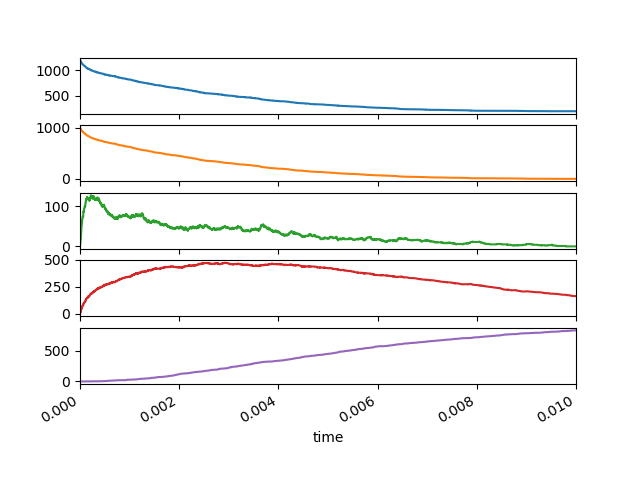

In [12]:
# Now we have the MCell data in the same format, we can compare the results the same way
axs = mcell_df[0].plot.line(subplots=True, legend=False)

<IPython.core.display.Javascript object>


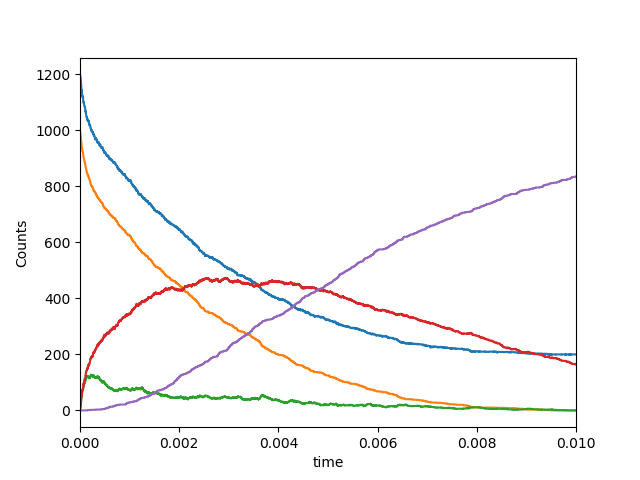

In [13]:
# And filter out certain data and plot all of them in a single plot
ax = mcell_df[0].plot(legend=False)
ax.set_xlabel("time")
_ = ax.set_ylabel("Counts")

<IPython.core.display.Javascript object>


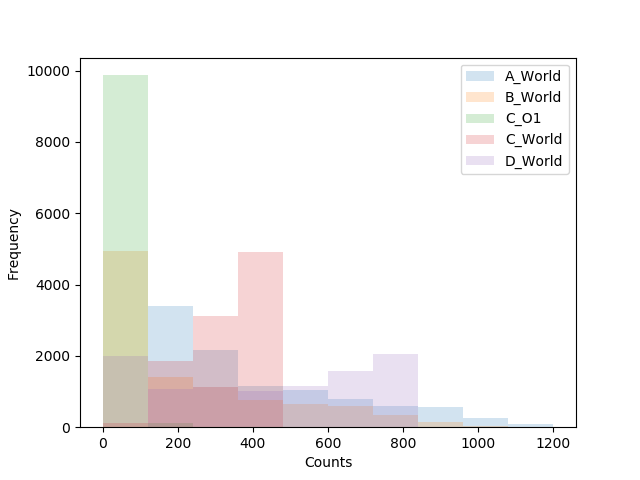

In [14]:
# Pandas still contain many interesting ways to visualize the data
ax = mcell_df[0].plot.hist(alpha=0.2)
ax.set_xlabel("Counts")
_ = ax.set_ylabel("Frequency")

/home0/shared/cellmod/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/home0/shared/cellmod/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


<IPython.core.display.Javascript object>


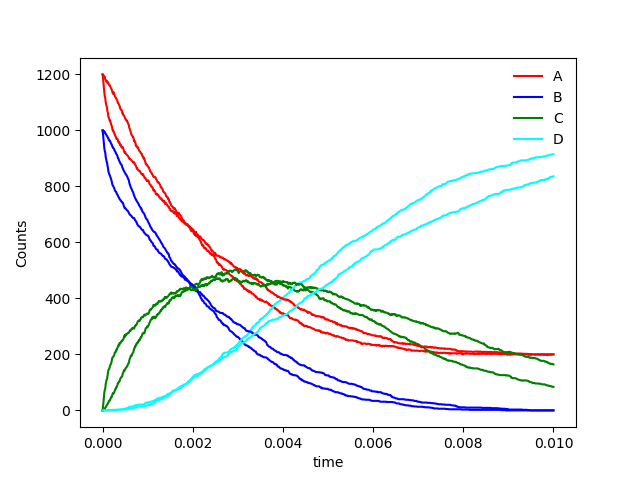

In [15]:
# Finally let's put them together
bng_dat = all_df[0].as_matrix()
mcell_dat = mcell_df[0].as_matrix()
# Pull time out 
time = all_df.index
# Get BNG data
bng_a = bng_dat[:,0]
bng_b = bng_dat[:,1]
bng_c = bng_dat[:,2]
bng_d = bng_dat[:,3]
# Get matching MCell data
mcell_a = mcell_dat[:,0][::10]
mcell_b = mcell_dat[:,1][::10]
mcell_c = mcell_dat[:,3][::10]
mcell_d = mcell_dat[:,4][::10]
# Put them all in a plot
plt.plot(time, bng_a, c="red", label="A")
plt.plot(time, bng_b, c="blue", label="B")
plt.plot(time, bng_c, c="green", label="C")
plt.plot(time, bng_d, c="cyan", label="D")
plt.plot(time, mcell_a, c="red")
plt.plot(time, mcell_b, c="blue")
plt.plot(time, mcell_c, c="green")
plt.plot(time, mcell_d, c="cyan")
plt.xlabel("time")
plt.ylabel("Counts")
_ = plt.legend(frameon=False)